   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
Missing values in features: 
housing_median_age      0
total_rooms         

C:\Users\Ar\AppData\Local\Temp\ipykernel_9044\546489636.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


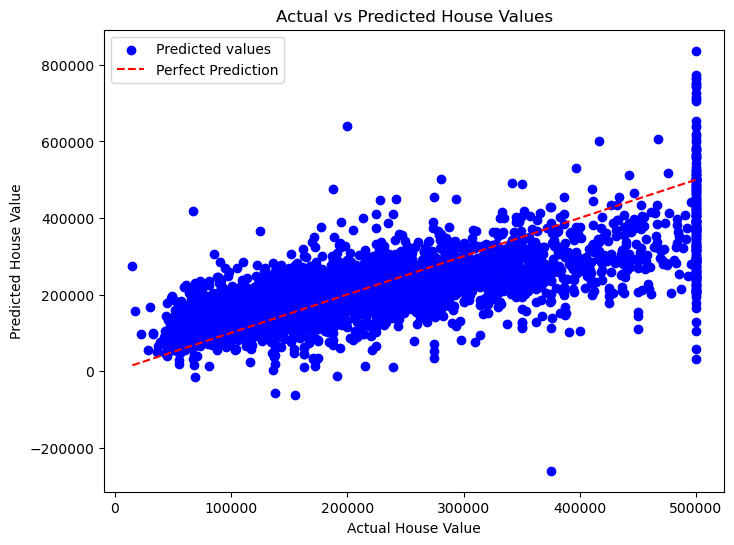

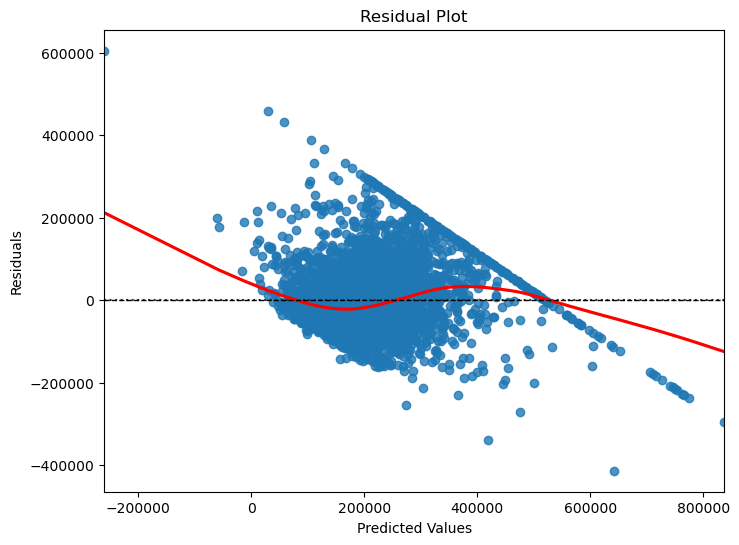

Cross-validation MAE scores: [-57399.96648706 -54249.24621    -58984.60572033 -61095.45351752
 -58747.66986169]


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('california_housing.csv') 
print(data.head())

X = data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income']]  
y = data['median_house_value']  

print(f"Missing values in features: \n{X.isnull().sum()}\n")

X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Display the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"Adjusted R²: {adj_r2}")

# Visualize the actual vs predicted values with a straight line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted values')  # Scatter plot of predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')  # Straight line
plt.title('Actual vs Predicted House Values')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.legend()
plt.show()

# Visualize the residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0
plt.show()

# Cross-validation (to check the model's performance on different data splits)
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE scores: {cross_val_scores}")